### Kütüphanelerin Yüklenmesi ve Görselleştirme Ayarlarının Yapılandırılması

Bu bölümde, veri analizi ve görselleştirme süreçlerinde kullanılacak temel Python kütüphaneleri projeye dahil edilmiştir. Her kütüphane, veri işleme sürecinin farklı bir aşamasında önemli roller üstlenir:

- `pandas`: Veri setlerini okumak, düzenlemek ve analiz etmek için kullanılır. Tablo yapısındaki veriler üzerinde hızlı ve etkili işlemler yapılmasını sağlar.
- `numpy`: Sayısal hesaplamalar ve çok boyutlu diziler üzerinde işlem yapma imkânı sunar. Veri manipülasyonunda temel bir araçtır.
- `seaborn`: İstatistiksel grafikleri kolayca oluşturmayı sağlayan bir görselleştirme kütüphanesidir. Veri dağılımları, ilişkiler ve kategorik karşılaştırmalar için güçlü araçlara sahiptir.
- `matplotlib.pyplot`: Temel grafik çizim işlemleri için kullanılır ve çoğu görselleştirmenin altında çalışan temel yapıyı oluşturur.
- `os`, `glob`, `re`: Dosya işlemleri ve regex işlemleri için kullanılır. Özellikle veri dosyalarının otomatik seçimi gibi görevlerde yardımcı olur.

Kod içerisinde ek olarak bazı yapılandırmalar gerçekleştirilmiştir:

- `pd.set_option('display.max_columns', None)`: Veri setindeki tüm sütunların eksiksiz görüntülenmesini sağlar. Çok sayıda sütuna sahip veri setleriyle çalışırken analiz sürecini kolaylaştırır.
- `sns.set_theme(style="whitegrid", palette="crest")`: Seaborn grafiklerinin varsayılan tema ve renk paletini belirler. Bu sayede tüm grafikler tutarlı bir görünüm kazanır.
- `palette = sns.color_palette("crest", as_cmap=True)`: Aynı renk temasının bazı sürekli renk haritalarında da kullanılabilmesini sağlar.
- `plt.rcParams['figure.figsize'] = (10, 6)`: Grafiklerin varsayılan boyutunu ayarlar, böylece görselleştirmelerin okunabilirliği artar.

Ayrıca, çalışma sırasında çok fazla uyarı mesajı üretiliyorsa isteğe bağlı olarak şu satır aktif edilebilir:

```python
# warnings.filterwarnings('ignore')

In [1]:
import os
import glob
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
from pathlib import Path
import warnings

# etl.ipynb: .../rfs/notebooks/etl.ipynb
# proje kökü: .../rfs
PROJECT_ROOT = Path.cwd().parents[0]
sys.path.insert(0, str(PROJECT_ROOT))

# Uyarıları devre dışı bırakmak istersen açabilirsin:

warnings.filterwarnings('ignore')

# Tüm sütunları göster
pd.set_option('display.max_columns', None)

# Grafik stilini ayarlayalım (isteğe bağlı)
sns.set_theme(style="whitegrid", palette="crest")
palette = sns.color_palette("crest", as_cmap=True)
plt.rcParams['figure.figsize'] = (10, 6)

### Veri Dosyasının Yüklenmesi ve Temizlenmesi

Etl aşamasından geçmiş Veri seti `hb_ty_df` olarak yüklendikten sonra `df` değişkenine kopyalanmış ve analizlerde kullanılmak üzere düzenlenmiştir. Veri setinden analizde ihtiyaç duyulmayan `Başlık`, `Çekilme Zamanı` ve `Link` sütunları çıkarılmıştır.

Kod sonunda `df.shape` komutu ile veri setindeki satır ve sütun sayısı görüntülenmiştir.

In [2]:
# Dosyayı oku
hb_ty_df = pd.read_csv('../data/external/laptop_data_processed.csv')
df = hb_ty_df.copy()

# Gereksiz sütunları sil
df.drop(['title', 'scraped_at', 'url'], axis=1, inplace=True)

# Veri boyutunu göster
df.shape

(3384, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             3383 non-null   object 
 1   intended_use      2804 non-null   object 
 2   color             3174 non-null   object 
 3   weight            3280 non-null   object 
 4   cpu_family        3326 non-null   object 
 5   cpu_model         3246 non-null   object 
 6   cpu_generation    2845 non-null   float64
 7   cpu_cores         2015 non-null   float64
 8   cpu_max_ghz       3059 non-null   float64
 9   ram_gb            3339 non-null   float64
 10  ram_type          3257 non-null   object 
 11  gpu_model         3336 non-null   object 
 12  gpu_type          3343 non-null   object 
 13  gpu_vram_gb       3308 non-null   float64
 14  gpu_vram_type     3031 non-null   object 
 15  ssd_gb            3268 non-null   float64
 16  hdd_gb            166 non-null    float64


In [4]:
df.sample(3)

,brand,intended_use,color,weight,cpu_family,cpu_model,cpu_generation,cpu_cores,cpu_max_ghz,ram_gb,ram_type,gpu_model,gpu_type,gpu_vram_gb,gpu_vram_type,ssd_gb,hdd_gb,screen_size_inch,resolution,display_standard,refresh_rate_hz,panel_type,operating_system,price_try,platform,source_file
706,dell,ofis-is,siyah,1 - 2 kg,intel core i5,1334u,13.0,NaN,4.6,16.0,ddr4,intel integrated,integrated,0.0,shared,512.0,NaN,15.6,1920x1080,fhd,120.0,wva,windows pro,27999.0,hepsiburada,hb_details_202512030147.csv
1268,msi,oyun,gri,2 kg ve altı,intel core i5,13420h,13.0,NaN,4.6,64.0,ddr4,nvidia rtx 3050,dedicated,4.0,gddr6,1024.0,NaN,15.6,1920x1080,fhd,144.0,NaN,freedos,43999.0,hepsiburada,hb_details_202512030147.csv
479,casper,NaN,gri,2 kg ve altı,intel core i7,13620h,13.0,NaN,4.9,16.0,ddr5,intel integrated,integrated,0.0,shared,500.0,NaN,16.0,1920x1200,NaN,NaN,ips,freedos,26489.8,hepsiburada,hb_details_202512030147.csv


### Eksik Veri Analizi

Bu bölümde veri setindeki eksik veriler analiz edilmiştir. Her bir sütun için eksik değerlerin oranı yüzde (%) cinsinden hesaplanmıştır. Sadece eksik değeri bulunan sütunlar filtrelenmiş ve eksik oranlarına göre azalan şekilde sıralanmıştır.

Bu analiz, sonraki veri temizleme ve ön işleme adımlarında hangi sütunların doldurulması, çıkarılması ya da dikkate alınması gerektiğine karar vermede yardımcı olur.

In [5]:
# Eksik veri yüzdeleri
missing_percent = df.isnull().mean() * 100

# Sadece eksik verisi olanları filtrele
missing_percent = missing_percent[missing_percent > 0]

# Büyükten küçüğe sırala ve yazdır
print(missing_percent.sort_values(ascending=False))

hdd_gb              95.094563
cpu_cores           40.455083
refresh_rate_hz     24.793144
intended_use        17.139480
panel_type          17.021277
cpu_generation      15.927896
gpu_vram_type       10.431442
cpu_max_ghz          9.604019
color                6.205674
display_standard     6.057920
cpu_model            4.078014
ram_type             3.752955
ssd_gb               3.427896
weight               3.073286
gpu_vram_gb          2.245863
cpu_family           1.713948
gpu_model            1.418440
ram_gb               1.329787
gpu_type             1.211584
operating_system     0.886525
screen_size_inch     0.738771
resolution           0.620567
brand                0.029551
price_try            0.029551
dtype: float64


### Kategorik (Object) Değişkenlerin Değer Dağılımı

Bu bölümde, veri setindeki `object` (kategorik) veri tipine sahip sütunların içerisindeki benzersiz değerler ve bu değerlerin frekansları incelenmiştir. Her bir kategorik sütun için `value_counts()` fonksiyonu kullanılarak değerlerin kaç kez tekrarlandığı listelenmiştir.

Bu analiz sayesinde:
- Sütunlarda hangi kategorilerin baskın olduğu,
- Beklenmeyen ya da tutarsız (örneğin "Siyah, Siyah" gibi tekrar eden) değerlerin olup olmadığı,
- Aykırı veya düşük frekanslı sınıfların tespiti

gibi bilgiler elde edilir. Bu bulgular, özellikle veri temizliği, etiket birleştirme ve model öncesi dönüşümler için yol gösterici olacaktır.

In [6]:
# Object sutunlarindaki degerleri ve sayilarini varsa aykiri degerleri gozlemleyelim 
for i in df.select_dtypes(include='object').columns:
     print(df[i].value_counts())
     print('****'*10)

brand
lenovo        1204
asus           651
hp             325
casper         258
dell           250
msi            218
monster        164
acer           155
game garaj      75
erazer          25
huawei          22
samsung         10
gigabyte         7
hometech         5
i-life           5
toshiba          3
tecno            2
chuwi            1
xiaomi           1
quadro           1
microsoft        1
Name: count, dtype: int64
****************************************
intended_use
ofis-is    1410
oyun       1163
ev-okul     226
tasarım       4
ev            1
Name: count, dtype: int64
****************************************
color
gri                 1463
siyah               1233
mavi                 208
gümüş                174
renkli                60
beyaz                 21
siiyah                 2
füme                   2
altın                  2
rose                   2
gr                     1
deniz kabuğu           1
metalik                1
haki                   1
s           

In [7]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
cpu_generation,2845.0,11.299121,3.255983,1.0,12.00,13.00,13.0,14.0
cpu_cores,2015.0,10.263027,4.764181,1.0,8.00,10.00,11.0,24.0
cpu_max_ghz,3059.0,4.542579,0.679995,1.1,4.40,4.60,4.9,6.0
ram_gb,3339.0,24.329440,17.776773,4.0,16.00,16.00,32.0,192.0
gpu_vram_gb,3308.0,3.105804,4.243174,0.0,0.00,0.00,6.0,32.0
ssd_gb,3268.0,930.662791,762.881338,32.0,512.00,512.00,1024.0,8192.0
hdd_gb,166.0,627.722892,381.932560,128.0,500.00,512.00,1024.0,2048.0
screen_size_inch,3359.0,15.625186,0.854325,7.0,15.60,15.60,16.0,18.0
refresh_rate_hz,2545.0,117.339489,58.093453,60.0,60.00,120.00,144.0,300.0
price_try,3383.0,50814.224857,36380.997201,6499.0,29156.35,41159.99,60419.0,381999.0


### Sayısal Sütunlardaki Aykırı Değerlerin Görselleştirilmesi

Bu bölümde, veri setindeki sayısal değişkenler için `boxplot` grafiklerinden yararlanılarak aykırı (outlier) değerler incelenmiştir. Her bir sayısal sütun için ayrı ayrı kutu grafiği çizilmiştir.

**Boxplot (Kutu Grafiği):**

- Ortadaki çizgi medyan değeri gösterir.
- Kutu (box) alt ve üst çeyrek değerlerini (Q1, Q3) temsil eder.
- Kutu dışındaki noktalar (uçlarda yer alanlar) genellikle aykırı değer olarak kabul edilir.

Bu analiz, özellikle regresyon gibi modellerde aykırı değerlerin etkisini azaltmak veya filtrelemek için faydalıdır. Aykırı değerler tespit edildikten sonra veri ön işleme aşamasında uygun bir şekilde ele alınabilir (örneğin silme, sınırlandırma, dönüştürme vb.).

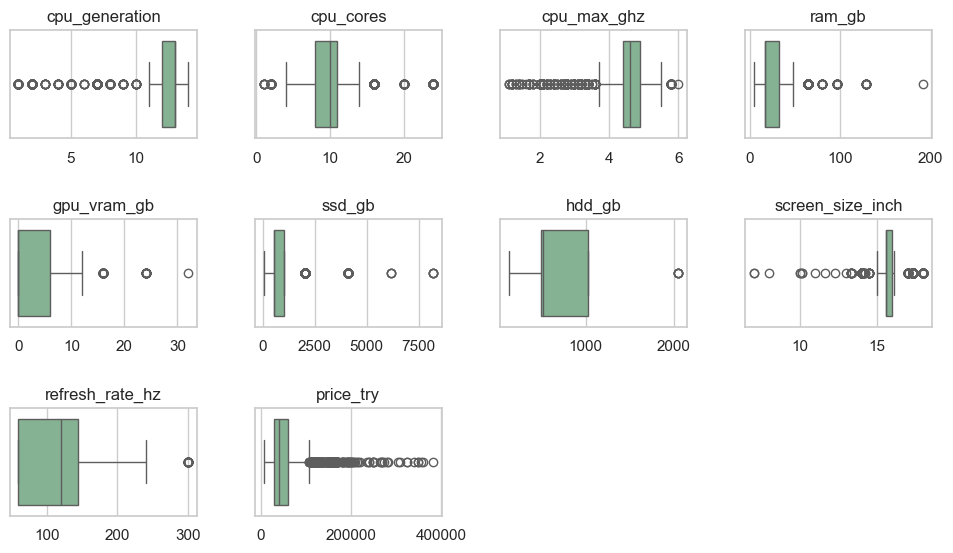

In [8]:
#Sayisal kolonlardaki aykiri degerleri gozlemleyelim
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Grid boyutu
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Grafik alanını oluştur
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 2 * n_rows))
axes = axes.flatten()  # Kolay erişim için düzleştir

# Her sütun için boxplot çiz
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")  

# Boş kalan subplotları kaldır
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

### Hepsiburada Verisinde Sayısal Değişkenler ile Fiyat İlişkilerinin Görselleştirilmesi

Bu bölümde Hepsiburada veri setindeki cihazların fiyatları ile çeşitli teknik özellikleri arasındaki ilişkiler, birden fazla grafiğin aynı düzen içerisinde sunulduğu **2x2 grid** yapısı kullanılarak görselleştirilmiştir. Böylece farklı değişkenlerin fiyata etkisi tek bir bakışta karşılaştırılabilir hale getirilmiştir.

Yapılan analizler şunları kapsamaktadır:

- `Markaya Göre Fiyat Dağılımı (Boxplot):`  
  Veri setinde en sık geçen ilk 8 marka seçilmiş, bu markalara ait fiyatların dağılımı incelenmiştir. Bu grafik, markalar arasındaki fiyat farklılıklarını, medyan seviyelerini ve aykırı değerleri görmeyi sağlar.

- `Ekran Kartı Tipine Göre Ortalama Fiyat (Barplot):`
  "Dahili", "Harici" gibi ekran kartı tiplerinin ortalama fiyat üzerindeki etkisi karşılaştırılmıştır. Harici ekran kartına sahip modellerin daha yüksek fiyat eğilimi gösterdiği gözlemlenebilir.

- `İşlemci Nesline Göre Ortalama Fiyat (Lineplot):`
  Sayısal forma dönüştürülmüş işlemci nesli değişkeni kullanılarak her neslin ortalama fiyatı hesaplanmış ve çizgi grafiği ile gösterilmiştir. Daha yeni nesil işlemcilerin fiyatları yukarı çekme eğiliminde olduğu görülebilir.

- `RAM Kapasitesi Dağılımı (Histogram):` 
  RAM değerlerinin frekans dağılımı incelenmiş; özellikle 8 GB, 16 GB ve 32 GB segmentlerinin yoğun olduğu, 64 GB ve üzerinin daha az bulunduğu belirlenmiştir.

Bu grid yapısı, ürün fiyatlarını etkileyebilecek temel donanımsal özelliklerin hızlı ve okunabilir şekilde karşılaştırılmasını sağlamaktadır. Görselleştirme sürecinde seaborn'un modern sürümleriyle uyumlu olacak şekilde gerekli parametre güncellemeleri yapılmış, uyarı veren eski kullanım biçimleri kaldırılmıştır.

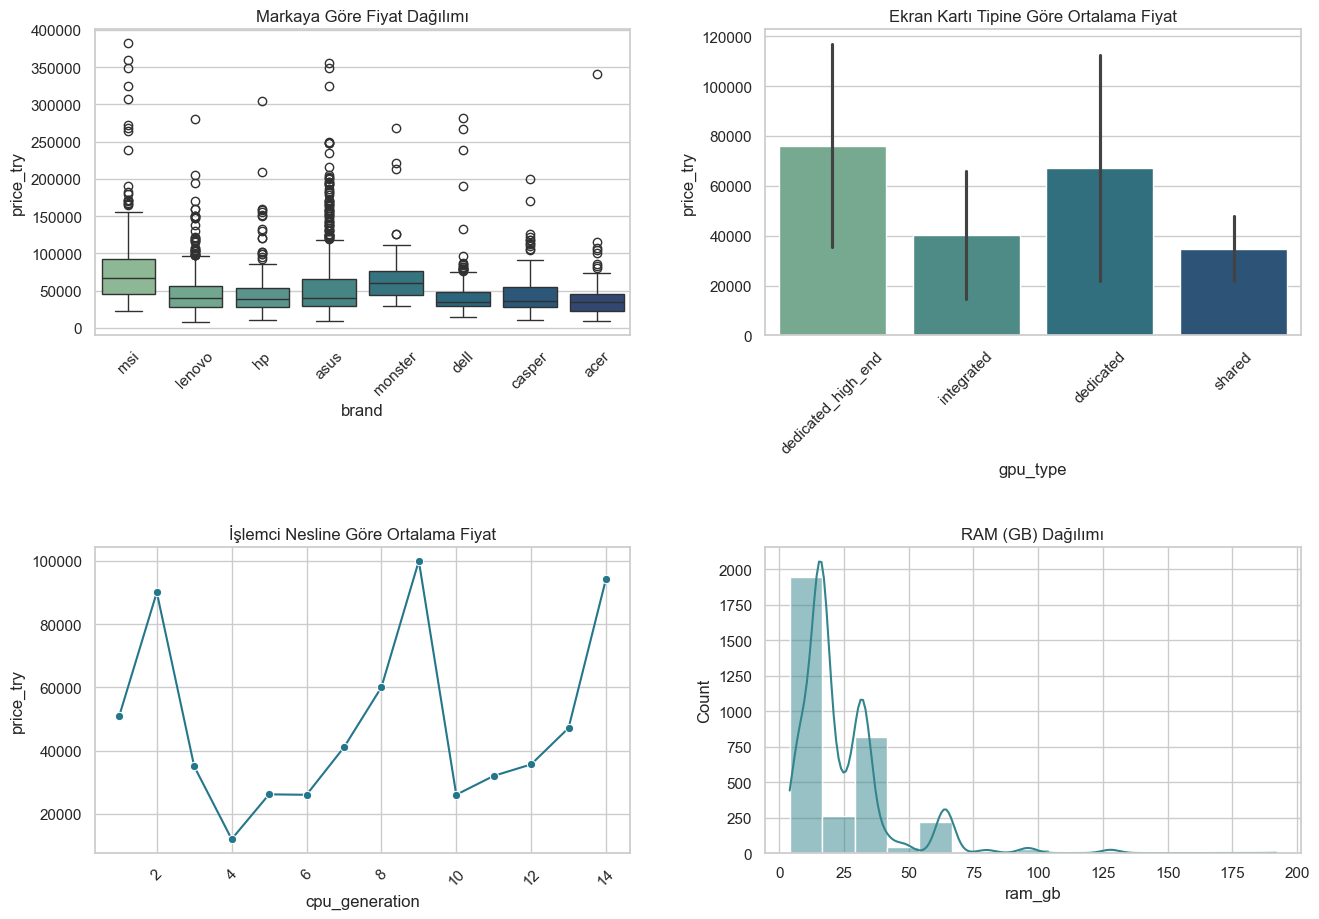

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid

# 1. Grafik: Marka'ya Göre Fiyat Dağılımı (Boxplot)
top_brands = df['brand'].value_counts().head(8).index
sns.boxplot(
    data=df[df['brand'].isin(top_brands)],
    x='brand',
    y='price_try',
    hue='brand',  # renk için gerekli
    palette="crest",
    legend=False,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Markaya Göre Fiyat Dağılımı')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Grafik: Ekran Kartı Tipine Göre Ortalama Fiyat (Barplot)
sns.barplot(
    data=df,
    x='gpu_type',
    y='price_try',
    errorbar='sd',
    hue='gpu_type',  # renk için gerekli
    palette="crest",
    legend=False,
    ax=axes[0, 1]
)
axes[0, 1].set_title('Ekran Kartı Tipine Göre Ortalama Fiyat')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Grafik: İşlemci Nesline Göre Ortalama Fiyat (Lineplot)
sns.lineplot(
    data=df[df['cpu_generation'].notna()],
    x='cpu_generation',
    y='price_try',
    estimator='mean',
    errorbar=None,
    marker='o',
    color=palette(0.6),
    ax=axes[1, 0]
)
axes[1, 0].set_title('İşlemci Nesline Göre Ortalama Fiyat')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Grafik: RAM Dağılımı (Histogram)
sns.histplot(
    data=df,
    x='ram_gb',
    bins=15,
    kde=True,
    color=palette(0.5),
    ax=axes[1, 1]
)
axes[1, 1].set_title('RAM (GB) Dağılımı')

plt.tight_layout(pad=3.0)
plt.show()

### Sayısal Değişkenler ile Fiyat Arasındaki İlişkinin İncelenmesi

Bu bölümde, çeşitli sayısal donanım özellikleri ile `Fiyat (TRY)` değişkeni arasındaki ilişkiler `scatterplot` (dağılım grafiği) kullanılarak görselleştirilmiştir.

İncelenen değişkenler:

- İşlemci Nesli
- İşlemci Çekirdek Sayısı  
- Maksimum İşlemci Hızı (GHz)  
- RAM (GB)  
- Ekran Kartı Hafızası (GB)  
- SSD Kapasitesi (GB)  
- Hard Disk Kapasitesi(GB)
- Ekran Boyutu (inç)  
- Ekran Yenileme Hızı (Hz)  

**Scatterplot (Dağılım Grafiği):**

- X ekseninde donanım özelliği, Y ekseninde fiyat yer alır.
- Her bir nokta bir ürünü temsil eder.
- Noktaların yoğunluğu, saçılım yönü ve kümelenmeleri değişkenler arası ilişkinin gücü hakkında fikir verir.

Bu görselleştirmeler sayesinde, örneğin RAM miktarı arttıkça fiyat da artıyor mu, daha yüksek ekran yenileme hızları fiyatı etkiliyor mu gibi sorulara görsel olarak yanıt aranmaktadır.

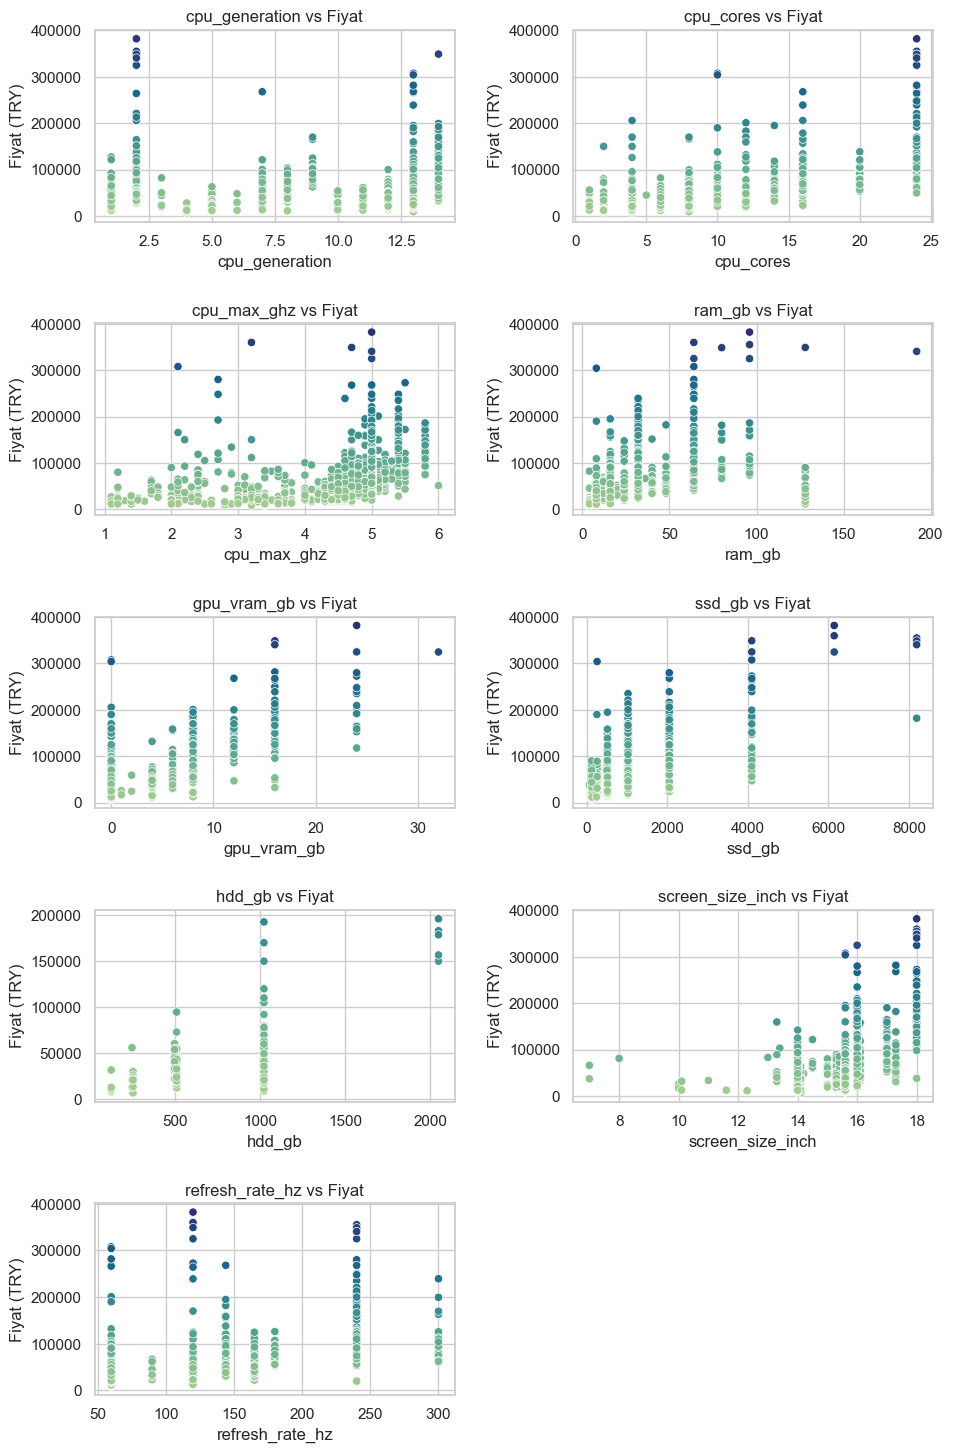

In [10]:
#numerical kolonlar ile Fiyat (TRY) arasindaki iliskiyi gozlemleyelim
# İncelenecek sayısal sütunlar
features = df.select_dtypes(include='number').columns.tolist()
features.remove('price_try')  # Hedef değişkeni çıkar

n_cols = 2
n_rows = (len(features) + n_cols - 1) // n_cols  # Satır sayısı hesaplanıyor

# Grid yapısı oluşturuluyor
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3* n_rows))
axes = axes.flatten()  # Kolay indeksleme için düzleştirme

# Her scatterplot için döngü
for i, feature in enumerate(features):
    sns.scatterplot(
        data=df,
        x=feature,
        y='price_try',
        ax=axes[i],
        hue=df['price_try'],
        palette=palette,
        legend=False
    )
    axes[i].set_title(f'{feature} vs Fiyat')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fiyat (TRY)')

# Boş kalan subplot'lar varsa sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)
plt.show()

#### PPI (Pixel Per Inch) Özelliği

PPI (Pixel Per Inch), bir ekranın inç başına düşen piksel sayısını ifade eder ve ekranın **keskinlik / netlik düzeyini** ölçmemize yarar. Aynı çözünürlüğe sahip iki ekrandan fiziksel boyutu daha küçük olanın PPI değeri daha yüksektir; bu da daha keskin bir görüntü anlamına gelir. Bu nedenle PPI, özellikle **ekran kalitesini fiyatla ilişkilendirirken** önemli bir teknik özelliktir.

Bu projede PPI, veri setinde hazır bir kolon olarak bulunmadığı için **feature engineering** adımıyla bizim tarafımızdan türetilmiştir. Bunu yaparken iki bilgiyi birlikte kullandık:

- `resolution` → örneğin `"1920 x 1080"`
- `screen_size_inch` → örneğin `15.6` inç

Önce çözünürlük değerini string formattan ayırıp yatay ve dikey piksel sayılarına dönüştürdük:

- `"1920 x 1080"` → `width = 1920`, `height = 1080`

Ardından PPI’ı şu mantıkla hesapladık:

- Ekranın diyagonal piksel sayısını hesapla (width ve height’ten),
- Bu değeri fiziksel ekran boyutuna (`screen_size_inch`) böl.

Bu sayede çözünürlük ve fiziksel ekran boyutunu tek bir metrikte birleştiren, yorumlanması kolay bir sayı elde ettik.

EDA sürecinde PPI dağılımını incelediğimizde:

- **Yüksek PPI** değerine sahip cihazların genellikle daha üst seviye ve **daha pahalı** modellerde yer aldığını,
- **Daha düşük PPI** değerine sahip cihazların ise çoğunlukla giriş ve orta segmentte konumlandığını gözlemledik.

Sonuç olarak PPI, hem **domain açısından anlamlı** (ekran kalitesini temsil ediyor) hem de **fiyat ile istatistiksel olarak ilişkili** olduğu için, modelde kullanılmaya değer bir türetilmiş özellik (engineered feature) olarak veri setimize eklenmiştir.

In [11]:
# 1) Resolution -> width/height ayıkla (boşluk/×/X toleranslı)
wh = (
    df["resolution"]
    .astype("string")
    .str.lower()
    .str.replace("×", "x", regex=False)
    .str.extract(r"(?P<w>\d{3,5})\s*x\s*(?P<h>\d{3,5})")
)

df["res_w"] = pd.to_numeric(wh["w"], errors="coerce")
df["res_h"] = pd.to_numeric(wh["h"], errors="coerce")

# 2) PPI = diagonal_pixels / diagonal_inches
inch = pd.to_numeric(df["screen_size_inch"], errors="coerce")
diag_px = np.sqrt(df["res_w"] ** 2 + df["res_h"] ** 2)

df["ppi"] = np.where((inch > 0) & diag_px.notna(), diag_px / inch, np.nan)

# 3) Kontrol
print("PPI NaN count:", int(df["ppi"].isna().sum()))
df[["screen_size_inch", "resolution", "res_w", "res_h", "ppi"]].head(10)

df = df.drop(columns=["res_w", "res_h"])

i_ppi = df.columns.get_loc("ppi")
i_prc = df.columns.get_loc("price_try")
cols = list(df.columns)
cols[i_ppi], cols[i_prc] = cols[i_prc], cols[i_ppi]
df = df[cols]

PPI NaN count: 30


### Sayısal Değişkenler Arasındaki Korelasyonun İncelenmesi

Bu bölümde, veri setindeki tüm sayısal sütunlar arasındaki ilişkiler `corr()` fonksiyonu kullanılarak hesaplanmış ve sonuçlar bir korelasyon matrisi şeklinde `heatmap` (ısı haritası) ile görselleştirilmiştir.

**Korelasyon (Correlation):**

- +1: Pozitif yönlü güçlü ilişki  
- -1: Negatif yönlü güçlü ilişki  
- 0: İlişki yok  

Isı haritasında `annot=True` parametresi sayesinde her hücrede ilgili korelasyon katsayısı sayısal olarak gösterilmiştir. Görselleştirme, özellikle **Fiyat (TRY)** değişkeni ile diğer sayısal değişkenler (örneğin RAM, SSD, işlemci hızı) arasındaki ilişkiyi incelemek için kullanılır.

Bu analiz, hangi değişkenlerin fiyatla daha güçlü ilişki içinde olduğunu belirleyerek modelleme sürecinde hangi özelliklerin daha açıklayıcı olduğunu saptamaya yardımcı olur.

<Axes: >

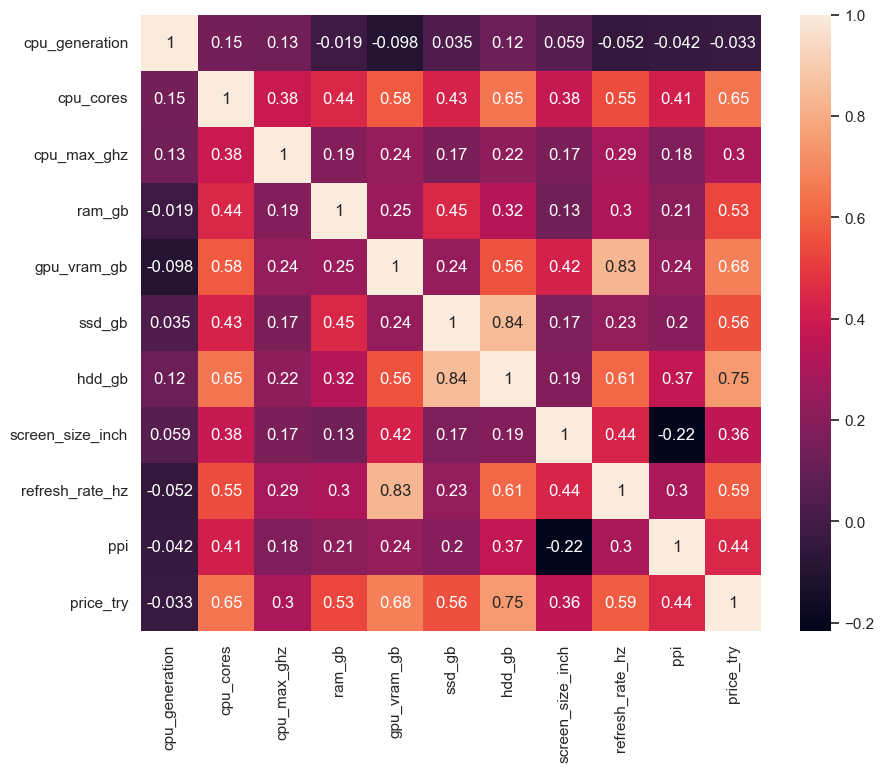

In [12]:
#numerical kolonlar arasindaki iliskiyi gozlemleyelim ve fiyat ile iliskili olanlari belirleyelim
df_corr = df.select_dtypes(include='number').corr() 
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot = True)

### Fiyat Dağılımının İncelenmesi ve Log Dönüşümü

Bu bölümde, `Fiyat (TRY)` değişkeninin dağılımı iki farklı şekilde görselleştirilmiştir:

1. **Orijinal Dağılım (Linear)**  
   `sns.displot()` fonksiyonu ile ürün fiyatlarının ham (log alınmamış) hali görselleştirilmiştir. Fiyat dağılımı genellikle sağa çarpık olup, bazı ürünler aşırı yüksek fiyatlara sahip olabilir.

2. **Log Dönüşümü Sonrası Dağılım**  
   `np.log()` ile logaritmik dönüşüm uygulanarak fiyatların daha normal (simetrik) bir dağılıma sahip olup olmadığı gözlemlenmiştir. Bu dönüşüm, özellikle aykırı değerlerin etkisini azaltmak ve modelleme aşamasında daha dengeli sonuçlar elde etmek için faydalıdır.

Bu analiz sonucunda, fiyat değişkeninin yapısı ve modellemeye uygunluğu hakkında önemli bilgiler elde edilir.

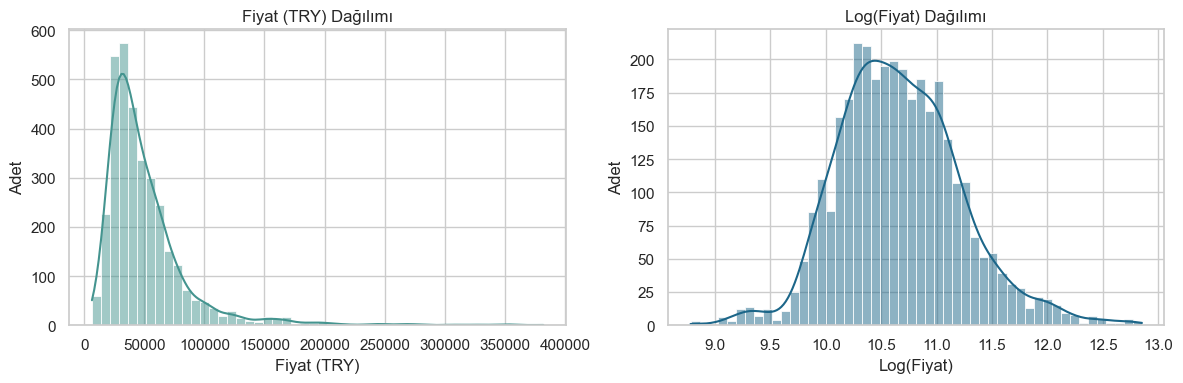

In [13]:
# NaN ve sıfır değerleri filtrele (log için gerekli)
log_prices = df['price_try'][df['price_try'] > 0].dropna()

# Renk paleti
palette = sns.color_palette("crest", as_cmap=True)

# Grid yapı: 1 satır, 2 sütun
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Orijinal fiyat dağılımı
sns.histplot(
    df['price_try'],
    bins=50,
    kde=True,
    ax=axes[0],
    color=palette(0.4)
)
axes[0].set_title('Fiyat (TRY) Dağılımı')
axes[0].set_xlabel('Fiyat (TRY)')
axes[0].set_ylabel('Adet')

# Log dönüşümlü fiyat dağılımı
sns.histplot(
    np.log(log_prices),
    bins=50,
    kde=True,
    ax=axes[1],
    color=palette(0.7)
)
axes[1].set_title('Log(Fiyat) Dağılımı')
axes[1].set_xlabel('Log(Fiyat)')
axes[1].set_ylabel('Adet')

plt.tight_layout()
plt.show()